<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/reading_spatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading and Writing Spatial Data**

In this notebook, you will learn how to read and write spatial data like ESRI shapefiles, GeoJSON and other formats using the `geopandas` library in Python.

### **Reading Spatial Data**

`geopandas` can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

`geopandas.read_file()`

In [1]:
!pip install geopandas #This line is to install geopandas in Google Colab
import geopandas as gpd
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.0 MB 17.0 MB/s 
     |████████████████████████████████| 6.3 MB 19.0 MB/s 
     |████████████████████████████████| 16.7 MB 6.9 MB/s 


In [2]:
%matplotlib inline

In [13]:
states = gpd.read_file("./sample_data/cb_2018_us_state_20m.shp")

The file is read into the variable `states`.

In [14]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [15]:
states.__class__

geopandas.geodataframe.GeoDataFrame

Note that last column `geometry` in the GeoDataFrame states contains shapes. Other columns contain the attributes of each ploygon, in our example of each state.

In [16]:
states.geometry

0     MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...
1     POLYGON ((-96.62187 42.77925, -96.57794 42.827...
2     POLYGON ((-75.77379 39.72220, -75.75323 39.757...
3     MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...
4     POLYGON ((-80.51989 40.90666, -80.51964 40.987...
5     POLYGON ((-104.05314 41.11446, -104.05245 41.2...
6     MULTIPOLYGON (((-123.23715 48.68347, -123.0704...
7     MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...
8     POLYGON ((-88.46866 31.89386, -88.46866 31.933...
9     POLYGON ((-94.61792 36.49941, -94.36120 36.499...
10    POLYGON ((-109.04919 31.79655, -109.04830 32.0...
11    POLYGON ((-106.62345 31.91403, -106.63011 31.9...
12    MULTIPOLYGON (((-118.59397 33.46720, -118.4847...
13    POLYGON ((-89.54443 36.57451, -89.47935 36.566...
14    POLYGON ((-85.60516 34.98468, -85.47434 34.983...
15    MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ...
16    POLYGON ((-124.55244 42.84057, -124.48094 42.9...
17    POLYGON ((-95.76564 40.58521, -95.53318 40

This is actually how the geometry is represented in Python. You can think of a `geopandas` dataframe as an attribute table in ArcGIS.

### **Plotting Spatial Data**

After your spatial data are read into the geodataframe, you can use this command to do a simple plot:

`Geodataframe.plot()`

There are several parameters you can add to the `plot()` command as well.

Some of these additional parameters are:


*   `figsize = (10,5)` - this will set the size of the figure. The first number represents the width of the figure and the second on represents the height, you can change them as you feel best.

*   `color = 'white`, it will set the fill color of the polygon. If you choose `red` your polygons will be colored red and so on.

*   `edgecolor = 'black'`, this sets the border of the polygons to a specific color. In this case its `black`, but you can also change it to any other color.






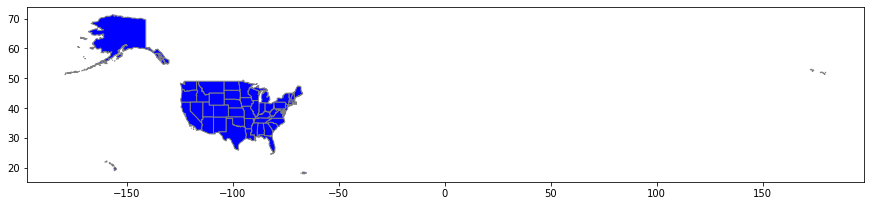

In [19]:
states.plot(figsize = (15,10), color = 'blue', edgecolor = 'grey')

A `geopandas` GeoDataFrame is a subclass of `pandas` DataFrame, which means that all the methods in `pandas.DataFrame` apply to `geopandas.GeoDataFrame`.

Let us try to filter out and slice the Geodataframe to pick a single state from all states in the U.S.



In [20]:
CA = states[states.NAME == 'California']
CA

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
12,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."


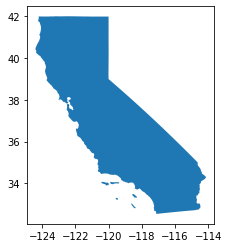

In [21]:
CA.plot()

In [23]:
AZ = states[states.NAME == 'Arizona']
AZ

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
50,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."


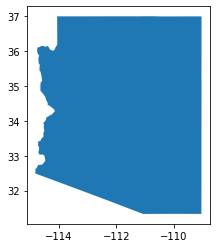

In [24]:
AZ.plot()

You can try to change the fill color of the polygon by using 
the `plot` function and adding the parameter `color = "<colorname>"`

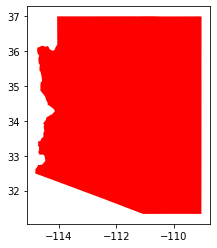

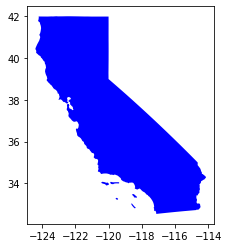

In [32]:
AZ.plot(color = "red")
CA.plot(color = "blue")

Now, let's add our capital ono the map. We will be creating a `shapely.geometry.Point` class, and use Irvine's longitude and latitude to initalize the `Point` class, like this:

In [33]:
from shapely.geometry import Point
IRV_coor = Point(-117.823059, 33.669445)
irv = gpd.GeoSeries(IRV_coor)

Text(0.5, 0.98, 'Irvine,California')

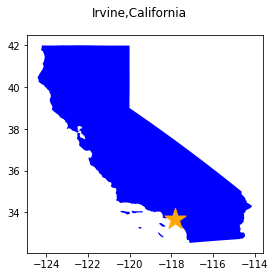

In [34]:
fig, ax = plt.subplots(1, 1)
CA.plot(ax=ax, color="blue")
irv.plot(ax=ax,marker="*",markersize=500,color="orange")
fig.suptitle("Irvine,California")